In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats

In [2]:
data = pd.read_excel('es_sp_customers_q1.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42898 entries, 0 to 42897
Data columns (total 16 columns):
CUSTOMER_ID      42898 non-null int64
TIER             42898 non-null object
ORDERS           42898 non-null int64
SALES            42898 non-null float64
NET_SALES        42898 non-null float64
BASKET_AVG       42898 non-null float64
CM1              42898 non-null float64
CM1_AVG          42898 non-null float64
CM1%             42898 non-null float64
%_NEG_CM1_ORD    42898 non-null float64
LOSS_IN_CM1      42898 non-null float64
CM2              42898 non-null float64
CM2_AVG          42898 non-null float64
CM2%             42898 non-null float64
%_NEG_CM2_ORD    42898 non-null float64
LOSS_IN_CM2      42898 non-null float64
dtypes: float64(13), int64(2), object(1)
memory usage: 5.2+ MB


In [4]:
data.sample(10)

,CUSTOMER_ID,TIER,ORDERS,SALES,NET_SALES,BASKET_AVG,CM1,CM1_AVG,CM1%,%_NEG_CM1_ORD,LOSS_IN_CM1,CM2,CM2_AVG,CM2%,%_NEG_CM2_ORD,LOSS_IN_CM2
31027,7297152,[51],1,57.64,51.80,57.64,7.16,7.16,13.82,0.0,0.0,-1.65,-1.65,-3.18,100.00,-1.65
19237,17037028,[56],2,116.81,102.27,58.40,34.66,17.33,33.89,0.0,0.0,17.94,8.97,17.54,0.00,0.00
11412,6059940,[54],3,583.09,529.45,194.36,88.91,29.64,16.79,0.0,0.0,25.38,8.46,4.79,0.00,0.00
1839,1557104,[52],3,320.03,277.23,106.68,88.42,29.47,31.89,0.0,0.0,46.35,15.45,16.72,0.00,0.00
10447,13096323,[51],3,153.21,138.64,51.07,16.92,5.64,12.21,0.0,0.0,-4.94,-1.65,-3.56,66.67,-6.20
12448,3424541,[51],1,98.52,85.18,98.52,22.22,22.22,26.09,0.0,0.0,7.55,7.55,8.86,0.00,0.00
28489,3198429,[51],1,64.98,59.07,64.98,18.76,18.76,31.76,0.0,0.0,11.13,11.13,18.84,0.00,0.00
14309,15474524,[53],3,177.69,155.82,59.23,49.11,16.37,31.52,0.0,0.0,21.07,7.02,13.52,0.00,0.00
21102,16865558,[56],1,110.14,100.13,110.14,28.45,28.45,28.41,0.0,0.0,19.51,19.51,19.49,0.00,0.00
40438,17385215,[51],1,64.98,59.07,64.98,7.77,7.77,13.16,0.0,0.0,0.73,0.73,1.23,0.00,0.00


In [5]:
data[['ORDERS', 'BASKET_AVG', 'CM2', 'CM2%']].fillna(0).describe().round(2)

,ORDERS,BASKET_AVG,CM2,CM2%
count,42898.00,42898.00,42898.00,42898.00
mean,1.98,76.77,11.60,7.36
std,5.08,46.18,33.58,20.16
min,1.00,-0.89,-417.90,-2893.37
25%,1.00,49.09,1.12,1.39
50%,2.00,65.06,6.81,7.45
75%,2.00,91.30,16.28,13.79
max,963.00,2773.61,5153.26,70.83


In [6]:
data['TIER'].unique()

array(['[54]', '[52]', '[54 53]', '[52 51]', '[52 54]', '[51]', '[51 52]',
       '[53]', '[53 54]', '[57]', '[56]', '[56 54]', '[56 52]', '[56 51]',
       '[55]', '[51 53]', '[56 53]', '[55 51]', '[55 52]', '[51 54]',
       '[151]', '[153]', '[156]', '[154]', '[202]', '[56 55]'],
      dtype=object)

In [7]:
selected_tiers = ['[51]',
 '[52]',
 '[53]',
 '[54]',
 '[55]',
 '[56]'
 ]
selected_tiers

['[51]', '[52]', '[53]', '[54]', '[55]', '[56]']

In [8]:
data = data[data['TIER'].isin(selected_tiers)]

In [9]:
data['CUSTOMER_ID'].nunique()

42387

In [10]:
tiers = [51, 52, 53, 54, 55, 56]

In [11]:
def get_number_from_string(i):
    changes = i.replace('[', '').replace(']', '')
    return int(changes)

In [12]:
data['TIER'] = data['TIER'].map(get_number_from_string)

In [13]:
data.head()

,CUSTOMER_ID,TIER,ORDERS,SALES,NET_SALES,BASKET_AVG,CM1,CM1_AVG,CM1%,%_NEG_CM1_ORD,LOSS_IN_CM1,CM2,CM2_AVG,CM2%,%_NEG_CM2_ORD,LOSS_IN_CM2
0,2443666,54,3,186.58,166.90,62.19,38.06,12.69,22.80,0.0,0.0,7.21,2.40,4.32,33.33,-1.30
1,8782381,54,4,417.90,379.12,104.48,77.14,19.29,20.35,0.0,0.0,19.77,4.94,5.21,25.00,-4.25
2,8974642,54,2,384.44,316.84,192.22,39.99,19.99,12.62,0.0,0.0,-4.49,-2.25,-1.42,100.00,-4.49
3,5744183,52,1,102.78,91.67,102.78,16.87,16.87,18.41,0.0,0.0,-1.08,-1.08,-1.17,100.00,-1.08
4,1746711,54,7,377.91,338.84,53.99,98.44,14.06,29.05,0.0,0.0,-5.56,-0.79,-1.64,85.71,-21.91


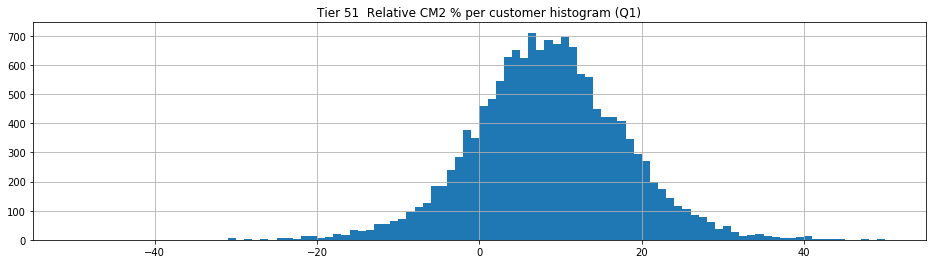

,CM2%
count,14828.000000
mean,8.432685
std,9.617360
min,-240.080000
25%,2.650000
50%,8.355000
75%,14.230000
max,70.830000


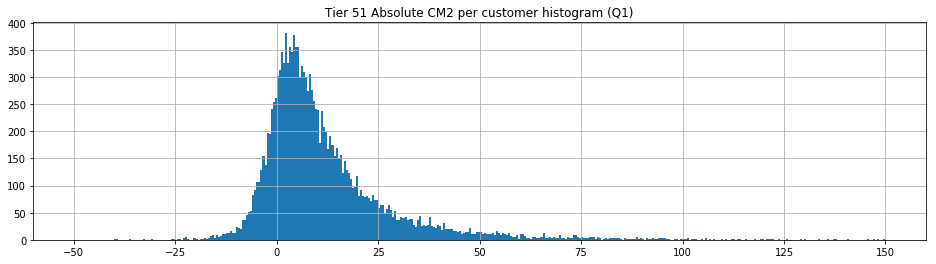

,CM2
count,14828.000000
mean,11.971760
std,18.190413
min,-76.640000
25%,2.007500
50%,7.460000
75%,16.422500
max,527.410000


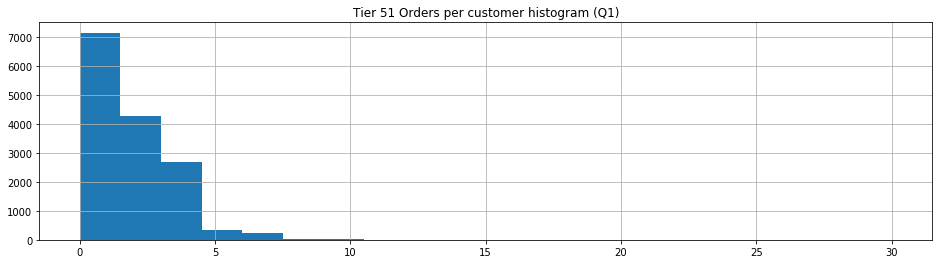

,ORDERS
count,14828.000000
mean,1.949487
std,1.386549
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,38.000000


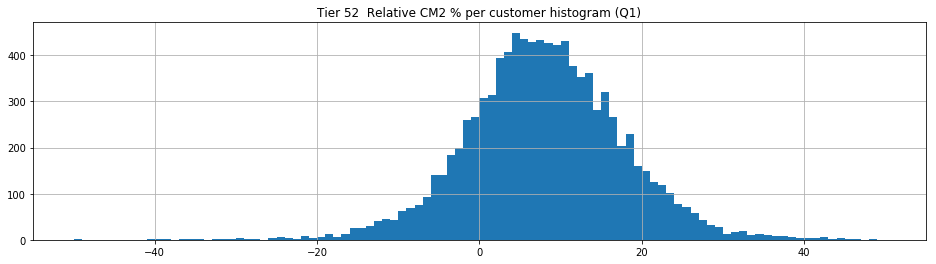

,CM2%
count,9732.000000
mean,7.635737
std,15.990036
min,-848.250000
25%,2.057500
50%,7.770000
75%,13.890000
max,53.840000


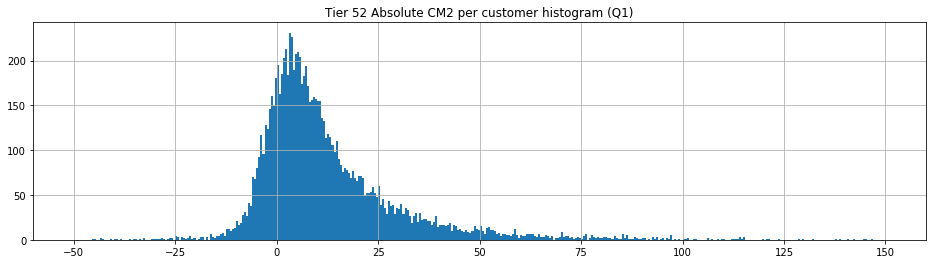

,CM2
count,9732.000000
mean,12.840655
std,21.719324
min,-417.900000
25%,1.680000
50%,7.820000
75%,18.177500
max,505.520000


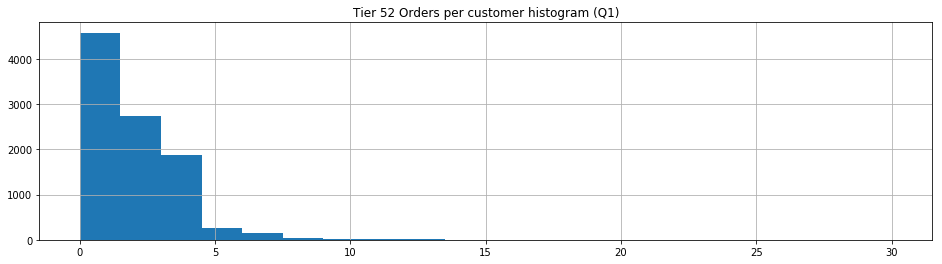

,ORDERS
count,9732.000000
mean,2.012125
std,1.492852
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,22.000000


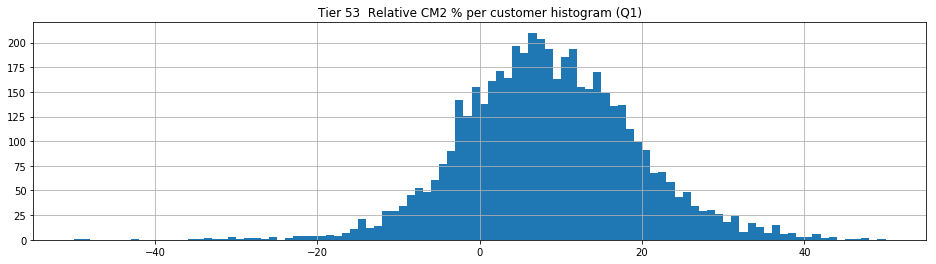

,CM2%
count,4919.000000
mean,8.145092
std,23.710582
min,-1468.750000
25%,1.510000
50%,8.100000
75%,15.225000
max,49.170000


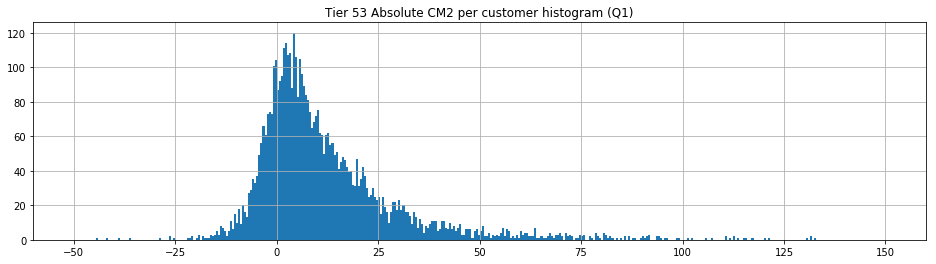

,CM2
count,4919.000000
mean,12.386471
std,20.478239
min,-190.420000
25%,1.245000
50%,7.300000
75%,17.880000
max,268.030000


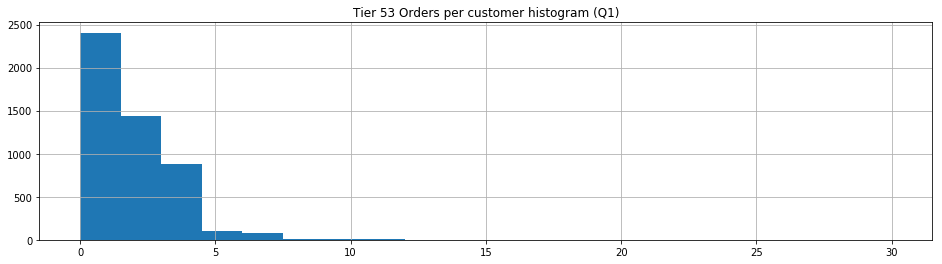

,ORDERS
count,4919.000000
mean,1.920106
std,1.383073
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,31.000000


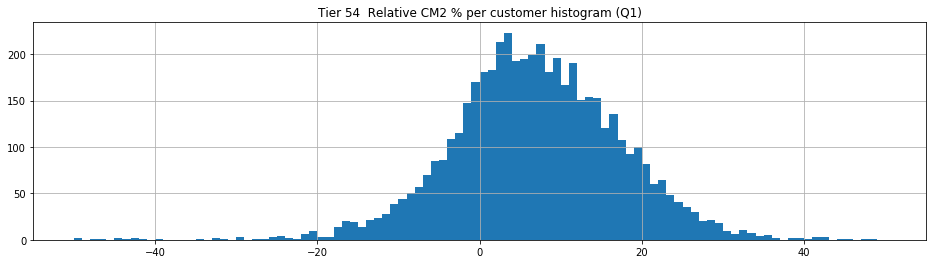

,CM2%
count,5008.000000
mean,5.826915
std,44.293115
min,-2893.370000
25%,0.430000
50%,6.710000
75%,13.565000
max,66.380000


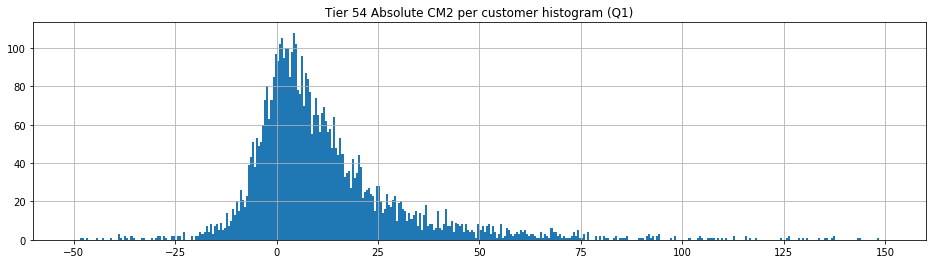

,CM2
count,5008.000000
mean,12.169928
std,28.681725
min,-386.430000
25%,0.350000
50%,7.105000
75%,17.837500
max,498.890000


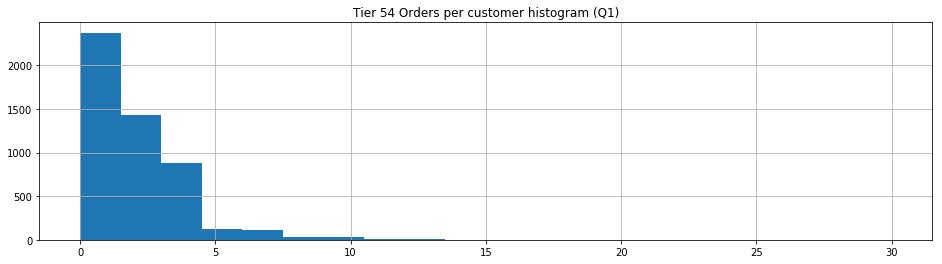

,ORDERS
count,5008.000000
mean,2.092851
std,1.948294
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,57.000000


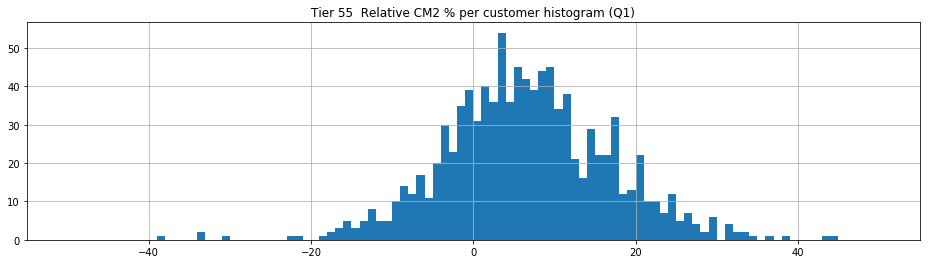

,CM2%
count,1003.000000
mean,6.521874
std,10.188324
min,-38.900000
25%,-0.080000
50%,6.080000
75%,12.825000
max,44.970000


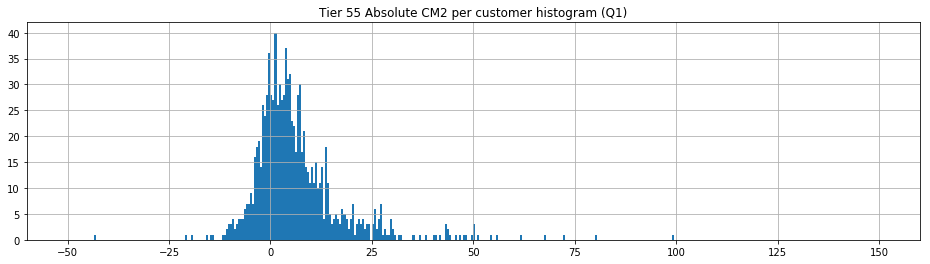

,CM2
count,1003.000000
mean,6.453998
std,11.332815
min,-43.460000
25%,-0.050000
50%,4.090000
75%,9.920000
max,99.210000


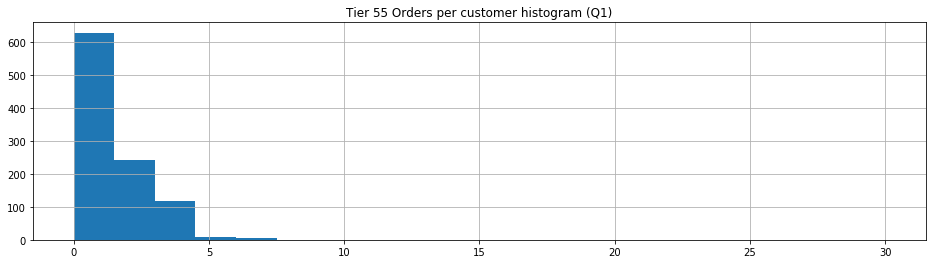

,ORDERS
count,1003.000000
mean,1.570289
std,0.912212
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,7.000000


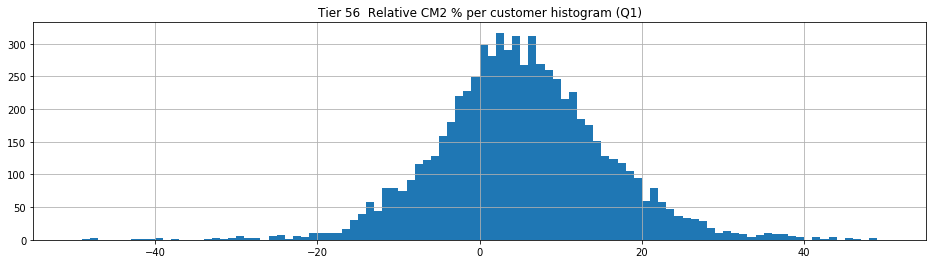

,CM2%
count,6897.000000
mean,5.113681
std,10.622887
min,-124.280000
25%,-1.210000
50%,4.770000
75%,11.420000
max,48.290000


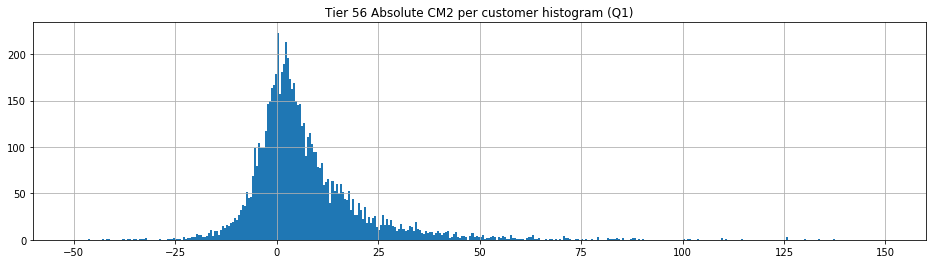

,CM2
count,6897.000000
mean,8.030971
std,68.252420
min,-286.880000
25%,-0.820000
50%,3.810000
75%,11.270000
max,5153.260000


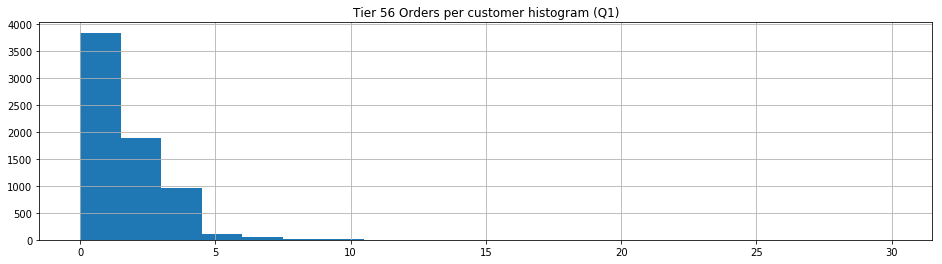

,ORDERS
count,6897.000000
mean,1.948673
std,12.198735
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,963.000000


In [14]:
for tq in tiers:
    data_tier = data[data['TIER'] == tq]
    
    plt.figure(figsize=(16,4))
    data_tier['CM2%'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2%'].describe()))
        
    plt.figure(figsize=(16,4))
    data_tier['CM2'].hist(bins=400, range=(-50, 150))
    title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2'].describe()))
    
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=20, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe()))

In [15]:
data_simulation = data.copy()

In [16]:
data_simulation['ORDERS'] = data_simulation['ORDERS'] * 3
data_simulation['CM2'] = data_simulation['CM2'] * 3

In [17]:
sim = data_simulation[['CUSTOMER_ID', 'TIER', 'ORDERS', 'CM2', 'CM2%']]

...........................................................TIER  51 ..........................................................


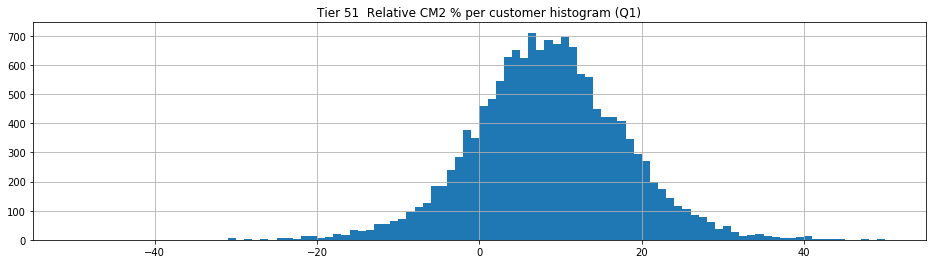

,CM2%
count,14828.000000
mean,8.432685
std,9.617360
min,-240.080000
25%,2.650000
50%,8.355000
75%,14.230000
max,70.830000


CM2% threshold >= 5  is the percentile 34.93
CM2% threshold >= 7  is the percentile 43.92
CM2% threshold >=  3.87  is the percentile 30 allowing us to stay with the 70% of our sample


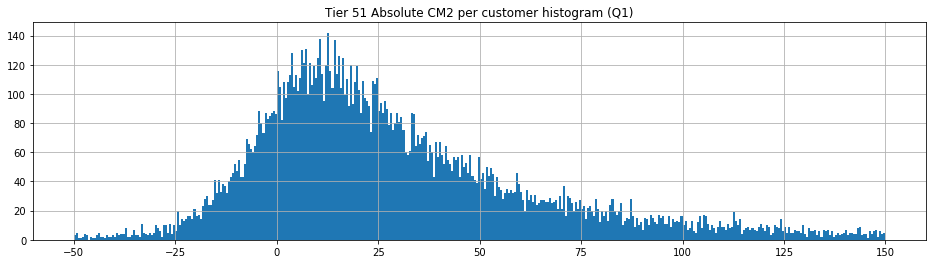

,CM2
count,14828.000000
mean,35.915281
std,54.571240
min,-229.920000
25%,6.022500
50%,22.380000
75%,49.267500
max,1582.230000


9.149999999999999  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  9.149999999999999  we keep eligible a  62.92  % from our customers
With CM2% threshold >= 7 and CM2 >=  9.149999999999999  we keep eligible a  55.32  % from our customers
With CM2% threshold >=  3.87  and CM2 >=  9.149999999999999  we keep eligible a  66.46  % from our customers


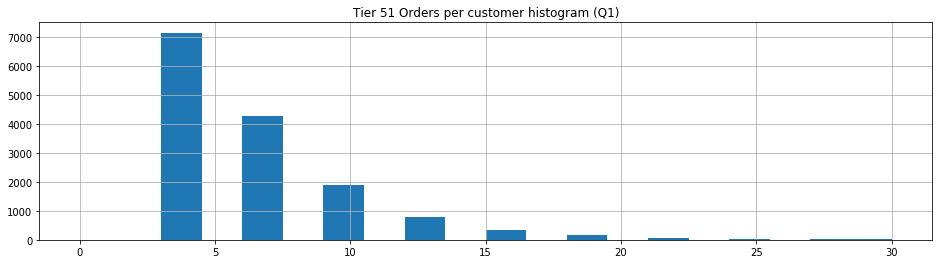

,ORDERS
count,14828.000000
mean,5.848462
std,4.159646
min,3.000000
25%,3.000000
50%,6.000000
75%,6.000000
max,114.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  65.07  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  56.08  % from our customers
With CM2% threshold >=  3.87  and Orders >=  3.0  we keep eligible a  70.02  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  52 ..........................................................


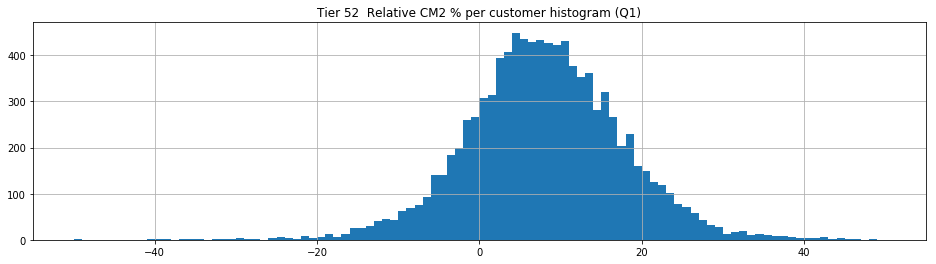

,CM2%
count,9732.000000
mean,7.635737
std,15.990036
min,-848.250000
25%,2.057500
50%,7.770000
75%,13.890000
max,53.840000


CM2% threshold >= 5  is the percentile 37.71
CM2% threshold >= 7  is the percentile 46.58
CM2% threshold >=  3.26  is the percentile 30 allowing us to stay with the 70% of our sample


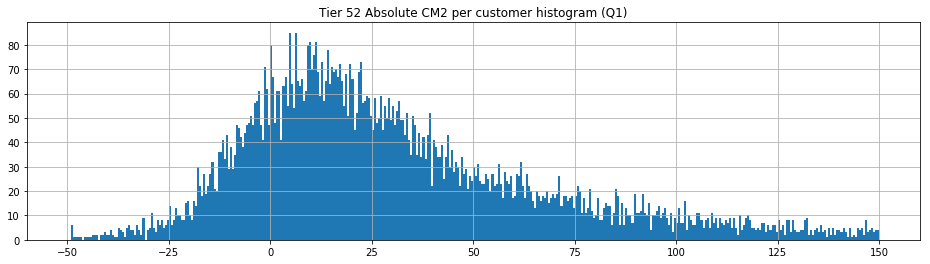

,CM2
count,9732.000000
mean,38.521964
std,65.157972
min,-1253.700000
25%,5.040000
50%,23.460000
75%,54.532500
max,1516.560000


8.850000000000001  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  8.850000000000001  we keep eligible a  60.97  % from our customers
With CM2% threshold >= 7 and CM2 >=  8.850000000000001  we keep eligible a  53.09  % from our customers
With CM2% threshold >=  3.26  and CM2 >=  8.850000000000001  we keep eligible a  66.66  % from our customers


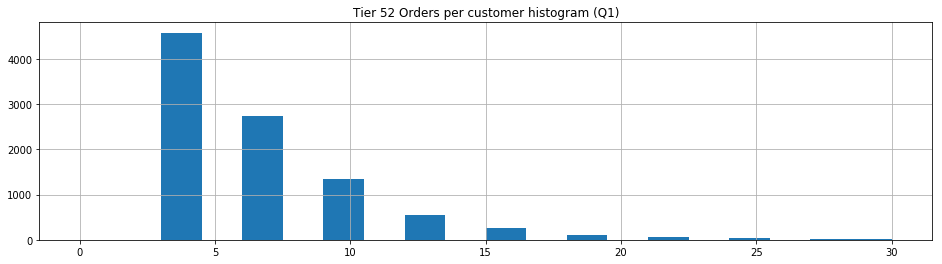

,ORDERS
count,9732.000000
mean,6.036375
std,4.478555
min,3.000000
25%,3.000000
50%,6.000000
75%,6.000000
max,66.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  62.29  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  53.42  % from our customers
With CM2% threshold >=  3.26  and Orders >=  3.0  we keep eligible a  70.01  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  53 ..........................................................


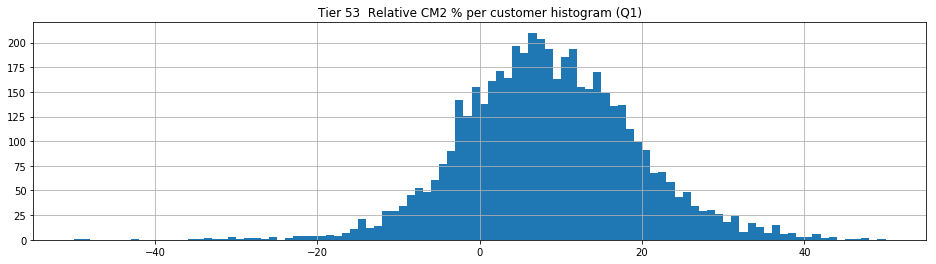

,CM2%
count,4919.000000
mean,8.145092
std,23.710582
min,-1468.750000
25%,1.510000
50%,8.100000
75%,15.225000
max,49.170000


CM2% threshold >= 5  is the percentile 37.34
CM2% threshold >= 7  is the percentile 45.46
CM2% threshold >=  2.997999999999997  is the percentile 30 allowing us to stay with the 70% of our sample


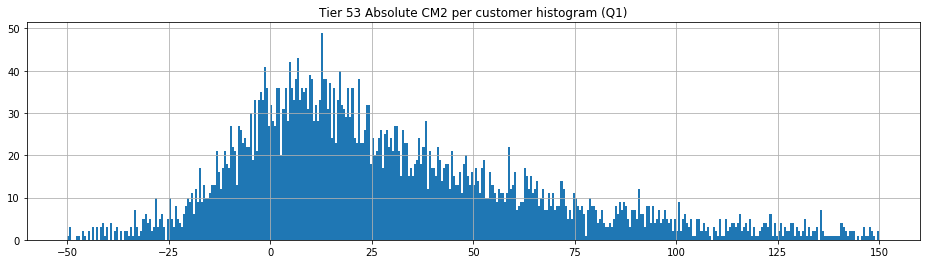

,CM2
count,4919.000000
mean,37.159412
std,61.434717
min,-571.260000
25%,3.735000
50%,21.900000
75%,53.640000
max,804.090000


7.050000000000001  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  7.050000000000001  we keep eligible a  61.88  % from our customers
With CM2% threshold >= 7 and CM2 >=  7.050000000000001  we keep eligible a  54.36  % from our customers
With CM2% threshold >=  2.997999999999997  and CM2 >=  7.050000000000001  we keep eligible a  67.27  % from our customers


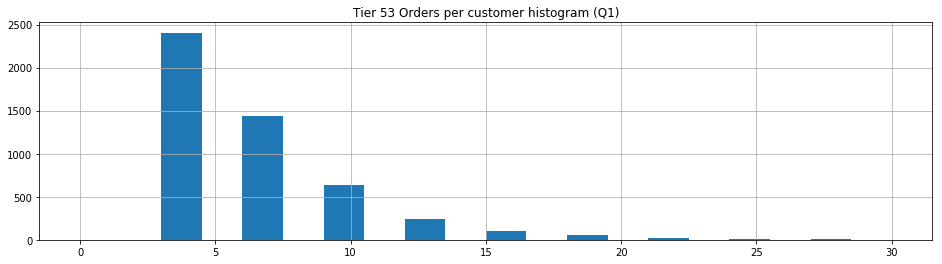

,ORDERS
count,4919.000000
mean,5.760317
std,4.149220
min,3.000000
25%,3.000000
50%,6.000000
75%,6.000000
max,93.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  62.66  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  54.54  % from our customers
With CM2% threshold >=  2.997999999999997  and Orders >=  3.0  we keep eligible a  69.99  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  54 ..........................................................


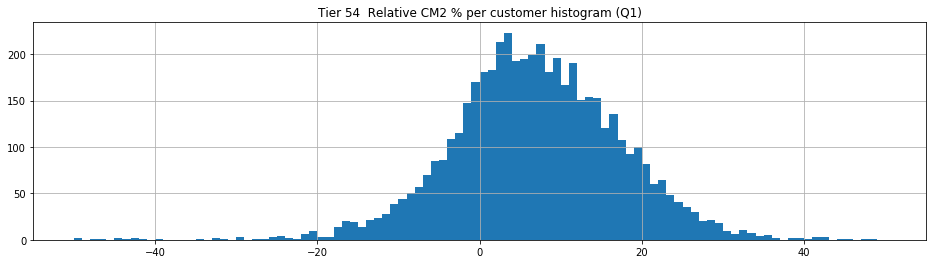

,CM2%
count,5008.000000
mean,5.826915
std,44.293115
min,-2893.370000
25%,0.430000
50%,6.710000
75%,13.565000
max,66.380000


CM2% threshold >= 5  is the percentile 43.45
CM2% threshold >= 7  is the percentile 51.32
CM2% threshold >=  1.7719999999999982  is the percentile 30 allowing us to stay with the 70% of our sample


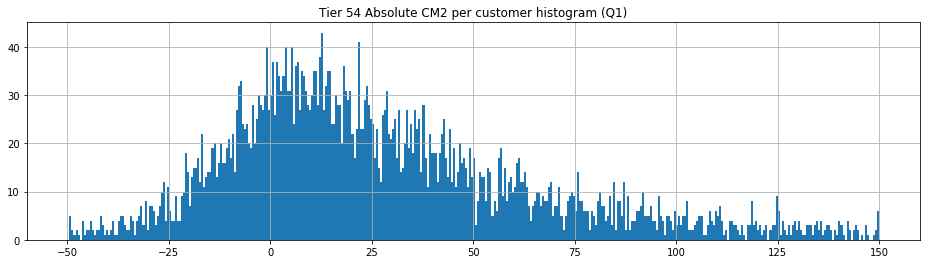

,CM2
count,5008.000000
mean,36.509784
std,86.045176
min,-1159.290000
25%,1.050000
50%,21.315000
75%,53.512500
max,1496.670000


4.8329999999999975  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  4.8329999999999975  we keep eligible a  56.49  % from our customers
With CM2% threshold >= 7 and CM2 >=  4.8329999999999975  we keep eligible a  48.68  % from our customers
With CM2% threshold >=  1.7719999999999982  and CM2 >=  4.8329999999999975  we keep eligible a  68.31  % from our customers


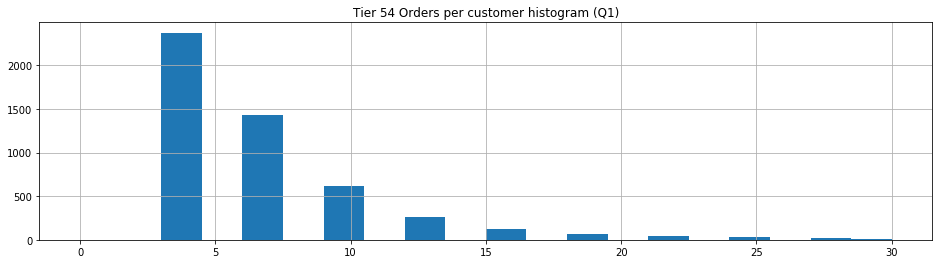

,ORDERS
count,5008.000000
mean,6.278554
std,5.844883
min,3.000000
25%,3.000000
50%,6.000000
75%,6.000000
max,171.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  56.55  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  48.68  % from our customers
With CM2% threshold >=  1.7719999999999982  and Orders >=  3.0  we keep eligible a  69.99  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  55 ..........................................................


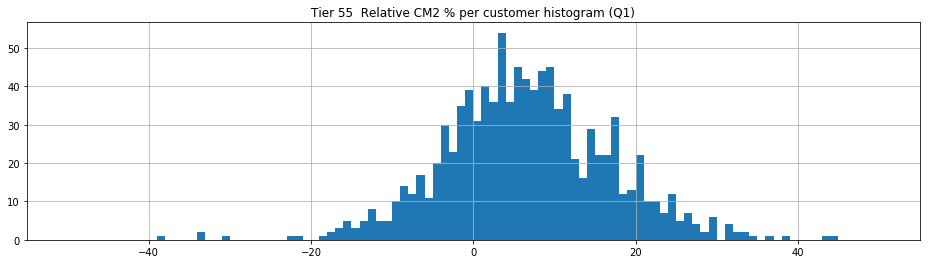

,CM2%
count,1003.000000
mean,6.521874
std,10.188324
min,-38.900000
25%,-0.080000
50%,6.080000
75%,12.825000
max,44.970000


CM2% threshold >= 5  is the percentile 44.97
CM2% threshold >= 7  is the percentile 53.64
CM2% threshold >=  1.3459999999999979  is the percentile 30 allowing us to stay with the 70% of our sample


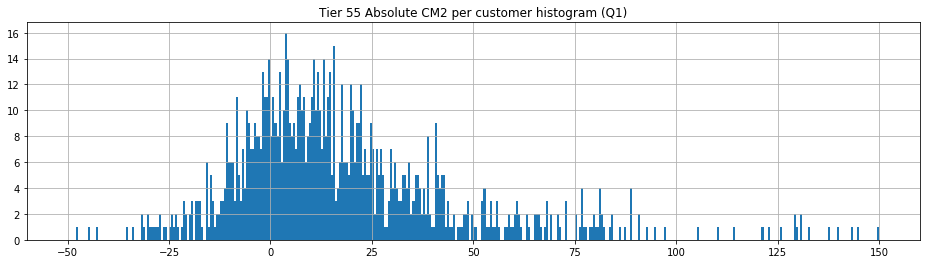

,CM2
count,1003.000000
mean,19.361994
std,33.998444
min,-130.380000
25%,-0.150000
50%,12.270000
75%,29.760000
max,297.630000


2.34  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  2.34  we keep eligible a  55.03  % from our customers
With CM2% threshold >= 7 and CM2 >=  2.34  we keep eligible a  46.36  % from our customers
With CM2% threshold >=  1.3459999999999979  and CM2 >=  2.34  we keep eligible a  68.79  % from our customers


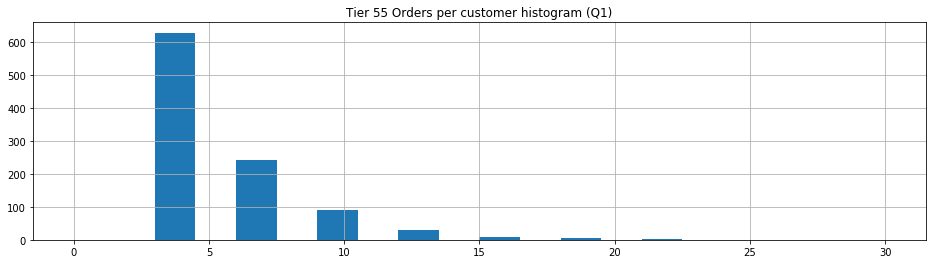

,ORDERS
count,1003.000000
mean,4.710867
std,2.736635
min,3.000000
25%,3.000000
50%,3.000000
75%,6.000000
max,21.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  55.03  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  46.36  % from our customers
With CM2% threshold >=  1.3459999999999979  and Orders >=  3.0  we keep eligible a  69.99  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  56 ..........................................................


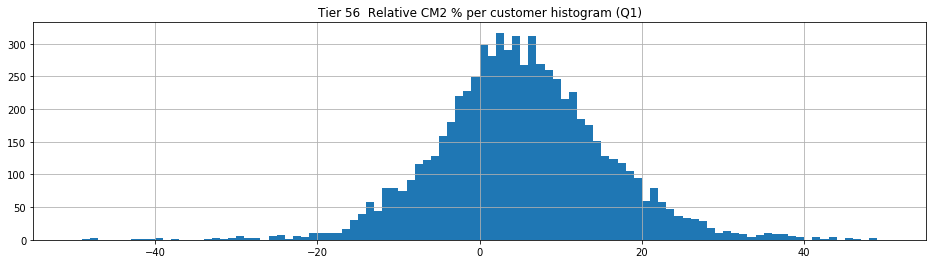

,CM2%
count,6897.000000
mean,5.113681
std,10.622887
min,-124.280000
25%,-1.210000
50%,4.770000
75%,11.420000
max,48.290000


CM2% threshold >= 5  is the percentile 50.95
CM2% threshold >= 7  is the percentile 59.34
CM2% threshold >=  0.18  is the percentile 30 allowing us to stay with the 70% of our sample


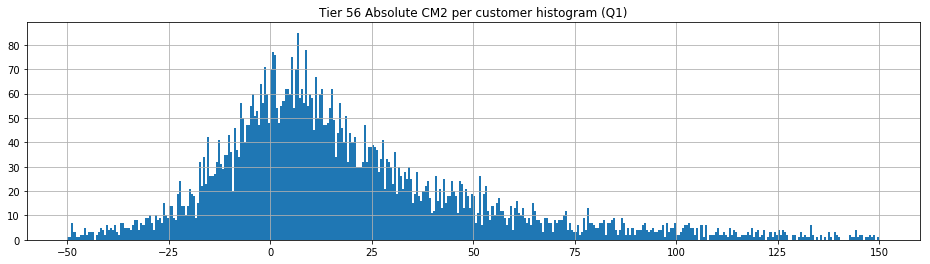

,CM2
count,6897.000000
mean,24.092914
std,204.757261
min,-860.640000
25%,-2.460000
50%,11.430000
75%,33.810000
max,15459.780000


0.39  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  0.39  we keep eligible a  49.05  % from our customers
With CM2% threshold >= 7 and CM2 >=  0.39  we keep eligible a  40.66  % from our customers
With CM2% threshold >=  0.18  and CM2 >=  0.39  we keep eligible a  69.77  % from our customers


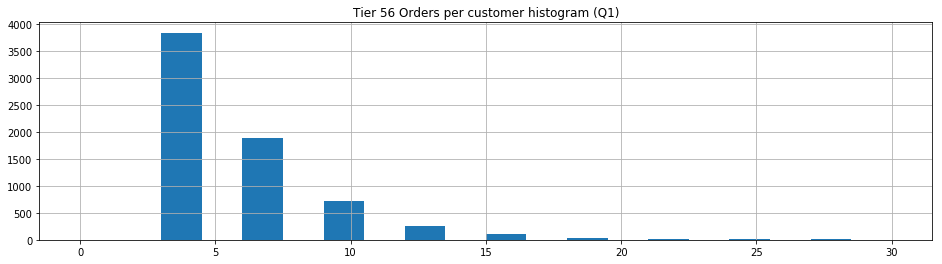

,ORDERS
count,6897.000000
mean,5.846020
std,36.596206
min,3.000000
25%,3.000000
50%,3.000000
75%,6.000000
max,2889.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  49.05  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  40.66  % from our customers
With CM2% threshold >=  0.18  and Orders >=  3.0  we keep eligible a  70.02  % from our customers
                                                                                                                    
                                                                                                                    


In [18]:
for tq in tiers:
    data_tier = sim[sim['TIER'] == tq]
    print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2%'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2%'].fillna(0).describe()))
    perc_30_cm2_rel = data_tier['CM2%'].fillna(0).quantile(.3)
    print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data_tier['CM2%'], 5, kind='strict').round(2))
    print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data_tier['CM2%'], 7, kind='strict').round(2))
    print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    # CM2 € per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2'].hist(bins=400, range=(-50, 150))
    title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2'].describe()))
    perc_30_cm2_abs = data_tier['CM2'].fillna(0).quantile(.3)
    val1 = float(data_tier[(data_tier['CM2%'] >= 5) & (data_tier['CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val2 = float(data_tier[(data_tier['CM2%'] >= 7) & (data_tier['CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val3 = float(data_tier[(data_tier['CM2%'] >= perc_30_cm2_rel) & (data_tier['CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
    # Orders per customer
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=20, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe()))
    perc_30_orders = data_tier['ORDERS'].quantile(.3)
    val4 = float(data_tier[(data_tier['CM2%'] >= 5) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val5 = float(data_tier[(data_tier['CM2%'] >= 7) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val6 = float(data_tier[(data_tier['CM2%'] >= perc_30_cm2_rel) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
    print('                                                                                                                    ')
    print('                                                                                                                    ')

In [19]:
(data['SALES'] / data['NET_SALES']).describe()

count    42387.000000
mean         1.113289
std          0.062426
min         -0.005184
25%          1.100013
50%          1.108173
75%          1.131719
max          1.230110
dtype: float64